In [47]:
import pandas as pd
import glob
import re
from functools import reduce

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

from collections import Counter

import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

In [48]:
import nltk

## riss 100 files download
## read excel file -> list[df,df,df, ...]

In [49]:
all_files = glob.glob("data_list2/my*.xls")
all_files

['data_list2\\myCabinetExcelData (1).xls',
 'data_list2\\myCabinetExcelData (2).xls',
 'data_list2\\myCabinetExcelData.xls']

In [50]:
all_files_data = []
for file in all_files:
    data_frame = pd.read_excel(file)
    all_files_data.append(data_frame)
    
all_files_data[0]

,Unnamed: 0,번호,제목,저자,출판사,출판일,학위논문사항
0,NaN,1,Functional analysis of gustatory receptors in ...,김해인,성균관대학교 일반대학원,2017,국내박사
1,NaN,2,Becker 모반의 조직 및 면역조직화학 특성 : Histopathologic an...,김영진,아주대학교 일반대학원,2007,국내석사
2,NaN,3,Molecular and Biochemical Characterization of ...,손영선,University of California,2000,해외박사
3,NaN,4,Development of client-server platform for clou...,"Jung, Jinwoong",Sungkyunkwan university,2019,국내석사
4,NaN,5,Novel chemosensory roles of the insect TRPA1(A...,두은조,성균관대학교 일반대학원,2020,국내박사
...,...,...,...,...,...,...,...
95,NaN,96,Changes in physicochemical properties of cacao...,이선호,이화여자대학교 대학원,2019,국내석사
96,NaN,97,Bioconversion of Mulberry Leaves With Viscozym...,김영욱,부산대학교 대학원,2017,국내석사
97,NaN,98,Implications of left septal muscular bundle po...,이승진,고려대학교,2009,국내박사
98,NaN,99,Establishment of optimal processing conditions...,이미현,이화여자대학교 대학원,2017,국내석사


## df_all <- list[df,df,df] concat

In [51]:
df_all = pd.concat(all_files_data, axis=0, ignore_index=True)
df_all

,Unnamed: 0,번호,제목,저자,출판사,출판일,학위논문사항
0,NaN,1,Functional analysis of gustatory receptors in ...,김해인,성균관대학교 일반대학원,2017,국내박사
1,NaN,2,Becker 모반의 조직 및 면역조직화학 특성 : Histopathologic an...,김영진,아주대학교 일반대학원,2007,국내석사
2,NaN,3,Molecular and Biochemical Characterization of ...,손영선,University of California,2000,해외박사
3,NaN,4,Development of client-server platform for clou...,"Jung, Jinwoong",Sungkyunkwan university,2019,국내석사
4,NaN,5,Novel chemosensory roles of the insect TRPA1(A...,두은조,성균관대학교 일반대학원,2020,국내박사
...,...,...,...,...,...,...,...
203,NaN,96,Using a computer game to promote a healthy lif...,"Peng, Wei",University of Southern California,2006,해외박사(DDOD)
204,NaN,97,Chemical abundances for ten metal-poor field s...,정현진,연세대학교 대학원,2005,국내석사
205,NaN,98,Essays on Transportation Economics with Focus ...,"Wang, Jiaxi","University of California, Irvine",2016,해외박사(DDOD)
206,NaN,99,(A) big data study about the characteristics a...,강승철,서울대학교 대학원,2020,국내박사


## extract title column

In [52]:
all_title = df_all['제목']
all_title

0      Functional analysis of gustatory receptors in ...
1      Becker 모반의 조직 및 면역조직화학 특성 : Histopathologic an...
2      Molecular and Biochemical Characterization of ...
3      Development of client-server platform for clou...
4      Novel chemosensory roles of the insect TRPA1(A...
                             ...                        
203    Using a computer game to promote a healthy lif...
204    Chemical abundances for ten metal-poor field s...
205    Essays on Transportation Economics with Focus ...
206    (A) big data study about the characteristics a...
207    Streets Features that Increase the Intention t...
Name: 제목, Length: 208, dtype: object

## preprocessing all_title = >to words list
- english start words -> to list
- word_tokenize(lower())
- stopwords processing
- lemmatize process

In [53]:
stopWords = set(stopwords.words("english"))
lemma = WordNetLemmatizer()

In [54]:
words = []

for title in all_title:
    EnWords = re.sub(r"[^a-zA-Z]+", " ", str(title))
    EnWordsToken = word_tokenize(EnWords.lower())
    EnWordsTokenStop = [w for w in EnWordsToken if w not in stopWords] # 익명함수 클로저
    EnWordsTokenStopLemma = [lemma.lemmatize(w) for w in EnWordsTokenStop]
    words.append(EnWordsTokenStopLemma)
words

[['functional',
  'analysis',
  'gustatory',
  'receptor',
  'drosophila',
  'melanogaster'],
 ['becker',
  'histopathologic',
  'immunohistochemical',
  'characteristic',
  'becker',
  'nevus'],
 ['molecular',
  'biochemical',
  'characterization',
  'upstream',
  'region',
  'gene',
  'cluster',
  'responsible',
  'biosynthesis',
  'cephabacins',
  'lysobacter',
  'lactamgenus',
  'ifo'],
 ['development',
  'client',
  'server',
  'platform',
  'cloud',
  'medium',
  'dj',
  'service'],
 ['novel', 'chemosensory', 'role', 'insect', 'trpa', 'isoform', 'trpa'],
 ['personal',
  'information',
  'management',
  'service',
  'design',
  'based',
  'character',
  'marketing'],
 ['amusement', 'park', 'outer', 'city'],
 ['development',
  'evaluation',
  'capacitive',
  'pressure',
  'sensor',
  'obtaining',
  'radial',
  'pulse',
  'wrist'],
 ['korean',
  'efl',
  'adult',
  'learner',
  'scaffolding',
  'learning',
  'reading',
  'comprehension',
  'strategy',
  'online',
  'book',
  'club',

## reduce(2nd list -> 1st list)

In [55]:
words2 = reduce(lambda x, y: x + y, words)
print(type(words2))
words2[:10]

<class 'list'>


['functional',
 'analysis',
 'gustatory',
 'receptor',
 'drosophila',
 'melanogaster',
 'becker',
 'histopathologic',
 'immunohistochemical',
 'characteristic']

## Counter

In [56]:
count = Counter(words2)
count

Counter({'functional': 4,
         'analysis': 11,
         'gustatory': 1,
         'receptor': 2,
         'drosophila': 1,
         'melanogaster': 1,
         'becker': 2,
         'histopathologic': 1,
         'immunohistochemical': 1,
         'characteristic': 3,
         'nevus': 1,
         'molecular': 3,
         'biochemical': 1,
         'characterization': 6,
         'upstream': 1,
         'region': 1,
         'gene': 2,
         'cluster': 1,
         'responsible': 1,
         'biosynthesis': 1,
         'cephabacins': 1,
         'lysobacter': 1,
         'lactamgenus': 1,
         'ifo': 1,
         'development': 8,
         'client': 1,
         'server': 1,
         'platform': 4,
         'cloud': 2,
         'medium': 4,
         'dj': 2,
         'service': 3,
         'novel': 5,
         'chemosensory': 1,
         'role': 6,
         'insect': 1,
         'trpa': 2,
         'isoform': 1,
         'personal': 1,
         'information': 3,
         'manage

## dict() <- most_common(20)

In [57]:
word_count = dict()

In [58]:
count.most_common(20)

[('cafe', 32),
 ('study', 27),
 ('acid', 21),
 ('effect', 17),
 ('design', 15),
 ('activity', 14),
 ('coffee', 13),
 ('caffeic', 12),
 ('analysis', 11),
 ('using', 11),
 ('l', 9),
 ('development', 8),
 ('strategy', 8),
 ('brand', 8),
 ('cancer', 8),
 ('cell', 8),
 ('application', 8),
 ('antioxidant', 8),
 ('city', 7),
 ('social', 7)]

In [59]:
for tag, counts in count.most_common(20):
    if (len(str(tag)) > 1):
        word_count[tag] = counts
print(word_count)

{'cafe': 32, 'study': 27, 'acid': 21, 'effect': 17, 'design': 15, 'activity': 14, 'coffee': 13, 'caffeic': 12, 'analysis': 11, 'using': 11, 'development': 8, 'strategy': 8, 'brand': 8, 'cancer': 8, 'cell': 8, 'application': 8, 'antioxidant': 8, 'city': 7, 'social': 7}


## dict() <-(len(word) > 1) filtering

In [60]:
del word_count['cafe']
del word_count['caffeic']
del word_count['using']

In [61]:
key_list = list(word_count.keys())
key_list[:10]

['study',
 'acid',
 'effect',
 'design',
 'activity',
 'coffee',
 'analysis',
 'development',
 'strategy',
 'brand']

In [62]:
sorted_keys_list = sorted(key_list) # sorted(key_list, reverse=True)
sorted_keys_list[:10]

['acid',
 'activity',
 'analysis',
 'antioxidant',
 'application',
 'brand',
 'cancer',
 'cell',
 'city',
 'coffee']

In [63]:
sorted_values = sorted(word_count.values(), reverse=True)
sorted_values[:10]

[27, 21, 17, 15, 14, 13, 11, 8, 8, 8]

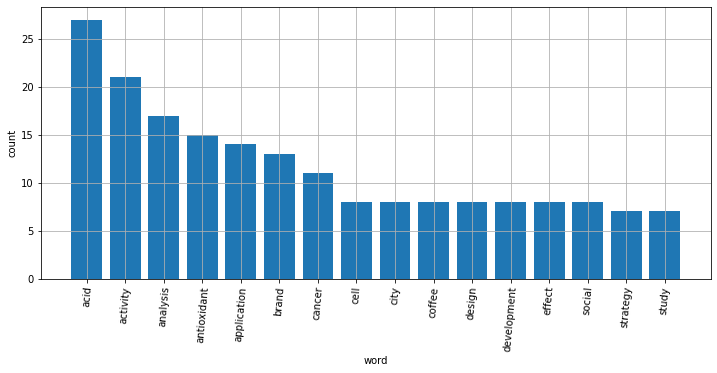

In [66]:
plt.figure(figsize=(12, 5))
plt.xlabel('word')
plt.ylabel('count')
plt.grid(True)

plt.bar(range(len(word_count)), sorted_values)
plt.xticks(range(len(word_count)), sorted_keys_list, rotation='85')
plt.show()